z5527155

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
import os
import pandas as pd
import seaborn as sns

csv_file = 'Chinese_MINST_Dataset\\chinese_mnist.csv'
df = pd.read_csv(csv_file)

img_dir = 'Chinese_MINST_Dataset\\data\\data'

def load_image(file_name):
    image_path = os.path.join(img_dir, file_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    return image.flatten()

X1 = []
y1 = []
X2 = []
y2 = []

df_sample_6000 = df.groupby('character').sample(n=400)
df_sample_11000 = df.groupby('character').sample(n=730)

for _, row in df_sample_6000.iterrows():
    image_name = f'input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg'
    label = row['value']
    X1.append(load_image(image_name))
    y1.append(label)

for _, row in df_sample_11000.iterrows():
    image_name = f'input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg'
    label = row['value']
    X2.append(load_image(image_name))
    y2.append(label)

X1 = np.array(X1)
y1 = np.array(y1)
X2 = np.array(X2)
y2 = np.array(y2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.10)

labels = ['零', '一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '百', '千', '万', '亿']
plt.rcParams["font.family"] = "SimHei"

------ 6000 images

KNeighbourClassifier

Accuracy: 59.22%
Precision: 0.67
Recall: 0.59
F1-Score: 0.60
              precision    recall  f1-score   support

           0       0.81      0.92      0.87        66
           1       0.37      0.92      0.53        72
           2       0.25      0.41      0.31        58
           3       0.38      0.43      0.41        60
           4       0.78      0.54      0.64        70
           5       0.68      0.45      0.54        56
           6       0.51      0.49      0.50        53
           7       0.66      0.43      0.52        54
           8       0.91      0.89      0.90        56
           9       0.72      0.47      0.57        55
          10       0.68      0.80      0.74        65
         100       0.88      0.49      0.63        61
        1000       0.70      0.53      0.61        58
       10000       0.82      0.56      0.67        66
   100000000       0.90      0.36      0.51        50

    accuracy                           0.59       900
   macro avg       

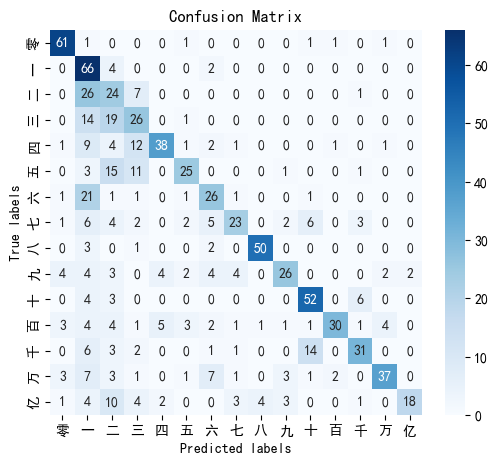

In [20]:
def KNN(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

KNN(X1_train, y1_train, X1_test, y1_test)

Decision Tree

Accuracy: 41.89%
Precision: 0.42
Recall: 0.42
F1-Score: 0.42
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        66
           1       0.85      0.79      0.82        72
           2       0.45      0.53      0.49        58
           3       0.37      0.30      0.33        60
           4       0.46      0.41      0.44        70
           5       0.35      0.34      0.34        56
           6       0.29      0.36      0.32        53
           7       0.35      0.33      0.34        54
           8       0.41      0.52      0.46        56
           9       0.20      0.22      0.21        55
          10       0.50      0.48      0.49        65
         100       0.24      0.21      0.23        61
        1000       0.43      0.41      0.42        58
       10000       0.35      0.38      0.36        66
   100000000       0.17      0.14      0.16        50

    accuracy                           0.42       900
   macro avg       

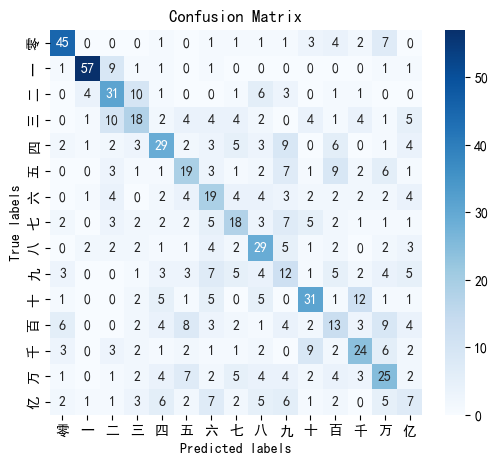

In [22]:
def DT(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_precision = precision_score(y_test, y_pred, average='weighted')
    dt_recall = recall_score(y_test, y_pred, average='weighted')
    dt_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {dt_accuracy * 100:.2f}%')
    print(f'Precision: {dt_precision:.2f}')
    print(f'Recall: {dt_recall:.2f}')
    print(f'F1-Score: {dt_f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

DT(X1_train, y1_train, X1_test, y1_test)

SGD

Accuracy: 31.78%
Precision: 0.37
Recall: 0.32
F1-Score: 0.31
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        66
           1       0.49      0.50      0.50        72
           2       0.22      0.21      0.21        58
           3       0.44      0.12      0.18        60
           4       0.62      0.23      0.33        70
           5       0.37      0.32      0.34        56
           6       0.26      0.13      0.17        53
           7       0.36      0.15      0.21        54
           8       0.29      0.64      0.40        56
           9       0.18      0.36      0.24        55
          10       0.59      0.26      0.36        65
         100       0.14      0.28      0.18        61
        1000       0.49      0.34      0.40        58
       10000       0.21      0.18      0.20        66
   100000000       0.31      0.30      0.31        50

    accuracy                           0.32       900
   macro avg       

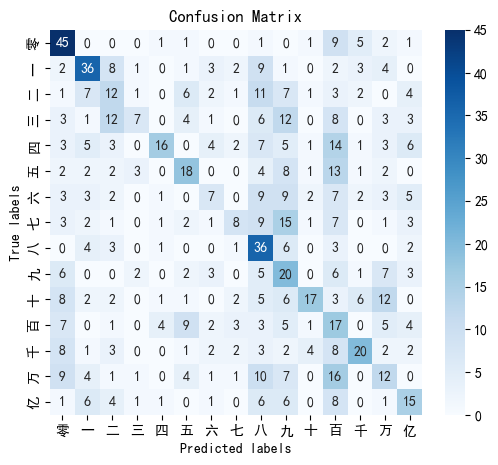

In [23]:
def SGD(X_train, y_train, X_test, y_test):
    sgd = SGDClassifier(max_iter=250)
    sgd.fit(X_train, y_train)

    y_pred = sgd.predict(X_test)
    sgd_accuracy = accuracy_score(y_test, y_pred)
    sgd_precision = precision_score(y_test, y_pred, average='weighted')
    sgd_recall = recall_score(y_test, y_pred, average='weighted')
    sgd_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {sgd_accuracy * 100:.2f}%')
    print(f'Precision: {sgd_precision:.2f}')
    print(f'Recall: {sgd_recall:.2f}')
    print(f'F1-Score: {sgd_f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

SGD(X1_train, y1_train, X1_test, y1_test)

------ 11000 images

KNeighbourClassfier

Accuracy: 65.48%
Precision: 0.72
Recall: 0.65
F1-Score: 0.66
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        78
           1       0.41      0.99      0.58        81
           2       0.41      0.64      0.50        69
           3       0.41      0.43      0.42        70
           4       0.83      0.68      0.75        79
           5       0.78      0.53      0.63        75
           6       0.69      0.59      0.64        80
           7       0.62      0.61      0.62        59
           8       0.96      0.96      0.96        76
           9       0.86      0.51      0.64        73
          10       0.56      0.79      0.66        72
         100       0.94      0.60      0.73        75
        1000       0.76      0.41      0.53        71
       10000       0.78      0.64      0.70        67
   100000000       0.85      0.49      0.62        70

    accuracy                           0.65      1095
   macro avg       

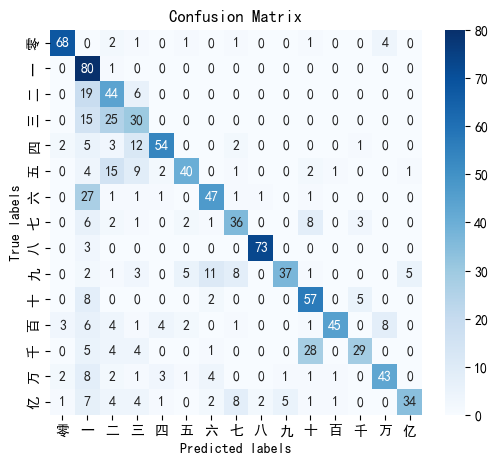

In [24]:
KNN(X2_train,y2_train, X2_test, y2_test)

Decision Tree

Accuracy: 47.76%
Precision: 0.48
Recall: 0.48
F1-Score: 0.48
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        78
           1       0.85      0.91      0.88        81
           2       0.55      0.55      0.55        69
           3       0.43      0.46      0.44        70
           4       0.47      0.46      0.46        79
           5       0.38      0.35      0.36        75
           6       0.37      0.31      0.34        80
           7       0.37      0.44      0.40        59
           8       0.54      0.58      0.56        76
           9       0.35      0.34      0.34        73
          10       0.51      0.56      0.53        72
         100       0.36      0.33      0.34        75
        1000       0.46      0.46      0.46        71
       10000       0.38      0.34      0.36        67
   100000000       0.33      0.36      0.34        70

    accuracy                           0.48      1095
   macro avg       

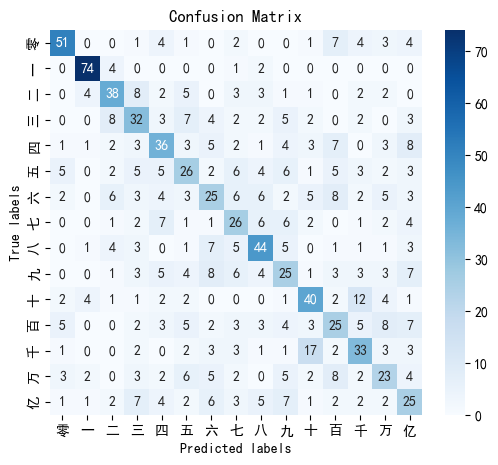

In [25]:
DT(X2_train,y2_train, X2_test, y2_test)

SGD

Accuracy: 32.05%
Precision: 0.37
Recall: 0.32
F1-Score: 0.32
              precision    recall  f1-score   support

           0       0.66      0.32      0.43        78
           1       0.55      0.60      0.58        81
           2       0.37      0.25      0.30        69
           3       0.40      0.24      0.30        70
           4       0.36      0.65      0.46        79
           5       0.28      0.37      0.32        75
           6       0.23      0.11      0.15        80
           7       0.15      0.36      0.21        59
           8       0.56      0.30      0.39        76
           9       0.19      0.38      0.25        73
          10       0.42      0.31      0.35        72
         100       0.24      0.16      0.19        75
        1000       0.51      0.27      0.35        71
       10000       0.20      0.27      0.23        67
   100000000       0.32      0.17      0.22        70

    accuracy                           0.32      1095
   macro avg       

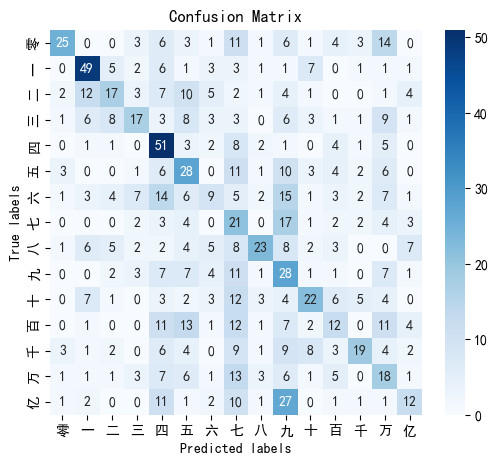

In [26]:
SGD(X2_train,y2_train, X2_test, y2_test)

It can be observed that the accuracy of each method increase with the size of the training dataset.